In [ ]:
import numpy as np  #linear algebra
import pandas as pd  #data processing
import os

import re    #for removing non-letter character
import nltk   #NLP

from nltk.corpus import stopwords   #to remove useless words
from nltk.stem.porter import *    #stemming

from sklearn.model_selection import train_test_split  #to split the data for training and testing purpose
# for building model
import tensorflow as tf
import seaborn as sns

In [ ]:
#for data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [ ]:
#loading dataset
data = pd.read_csv("Twitter_Data.csv")
data.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
#checking for missing data (null data)
data.isnull().sum()
data.shape

(162980, 2)

In [ ]:
#dropping missing data
data.dropna(axis=0, inplace=True)
data.shape  #data dimensions

(162969, 2)

In [ ]:
#mapping tweet categories
data['category'] = data['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


<AxesSubplot:xlabel='category'>

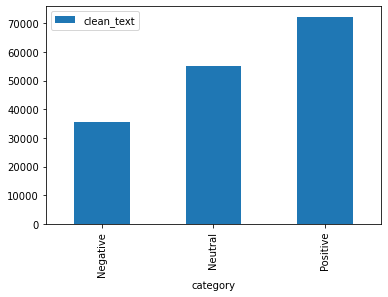

In [ ]:
#distribution of sentiments
data.groupby('category').count().plot(kind='bar')

<AxesSubplot:>

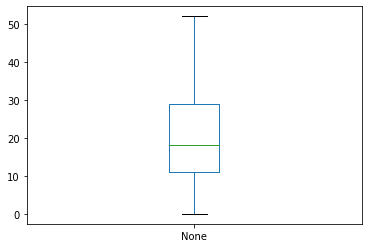

In [ ]:
#calulating tweets length
tweet_len = pd.Series([len(tweet.split()) for tweet in data['clean_text']])

#distribution of tweet text lengths
tweet_len.plot(kind='box')

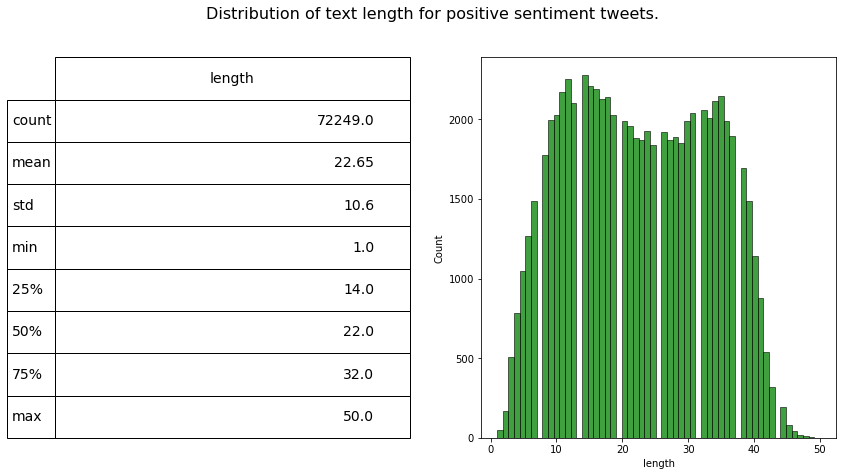

In [ ]:
#plotting the distribution of text length for positive sentiment tweets
fig = plt.figure(figsize=(14,7))
data['length'] = data.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['category']=='Positive']['length'], ax=ax1,color='green')
describe = data.length[data.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size=14
bbox = [0,0,1,1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)
plt.show()

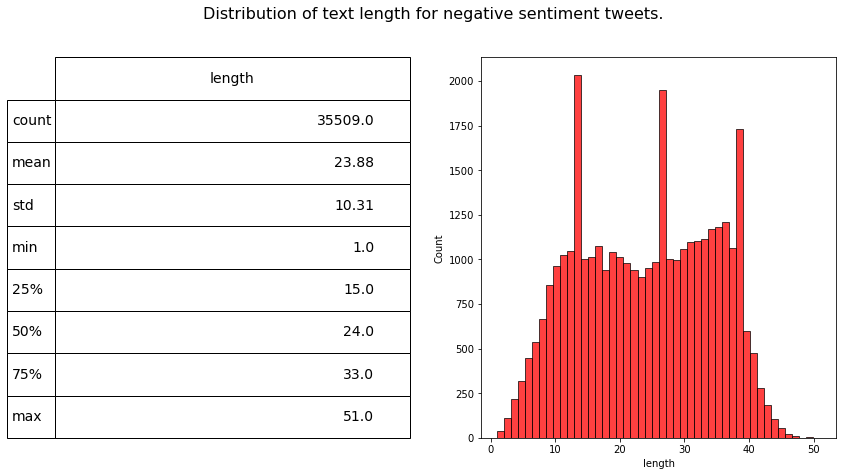

In [ ]:
#plotting the distribution of text length for negative sentiment tweets
fig = plt.figure(figsize=(14,7))
data['length'] = data.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['category']=='Negative']['length'], ax=ax1,color='red')
describe = data.length[data.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size=14
bbox = [0,0,1,1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)
plt.show()

In [ ]:
labels=['Negative','Neutral','Positive']
sizes=[]
colors = ['red','yellow','green']
p=0
n=0
N=0
for i in data['category']:
    if i=='Negative':
        n+=1
    elif i=='Positive':
        p+=1
    else:
        N+=1
sizes.append(n)
sizes.append(N)
sizes.append(p)


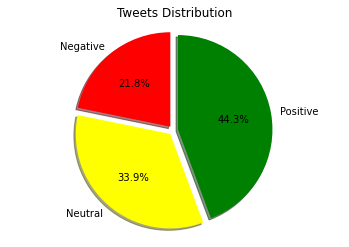

In [ ]:
#pie chart for tweets
explode = (0.05, 0.05, 0.05)
plt.pie(sizes,explode = explode,colors=colors,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title("Tweets Distribution")
plt.show()

In [ ]:
data.drop(['length'],axis=1,inplace=True)
data.head

<bound method NDFrame.head of                                                clean_text  category
0       when modi promised “minimum government maximum...  Negative
1       talk all the nonsense and continue all the dra...   Neutral
2       what did just say vote for modi  welcome bjp t...  Positive
3       asking his supporters prefix chowkidar their n...  Positive
4       answer who among these the most powerful world...  Positive
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...  Negative
162976  dear rss terrorist payal gawar what about modi...  Negative
162977  did you cover her interaction forum where she ...   Neutral
162978  there big project came into india modi dream p...   Neutral
162979  have you ever listen about like gurukul where ...  Positive

[162969 rows x 2 columns]>

In [ ]:
def tweet_to_words(tweet):
    text = tweet.lower() #make all letters to lowercase
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) #remove non-letters
    words = text.split() #tokenize
    words = [w for w in words if w not in stopwords.words("english")] #removing stopwords
    words = [PorterStemmer().stem(w) for w in words]
    return words
print("\nOriginal tweet -> ",data['clean_text'][0])
print("\nProcessed tweet -> ",data['clean_text'][0])


Original tweet ->  when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet ->  when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples


In [ ]:
X = list(map(tweet_to_words,data['clean_text']))

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data['category'])

In [ ]:
print(X[0])
print(Y[0])

['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']
0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print('Number of tweets in the total set : {}'.format(len(X)))
print('Number of tweets in the training set : {}'.format(len(X_train)))
print('Number of tweets in the testing set : {}'.format(len(X_test)))

Number of tweets in the total set : 162969
Number of tweets in the training set : 130375
Number of tweets in the testing set : 32594


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(max_features=5000,preprocessor=lambda x:x, tokenizer=lambda x:x)
X_train=count_vector.fit_transform(X_train).toarray()
X_test=count_vector.fit_transform(X_test).toarray()

In [ ]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:50])

['100', '1000', '10000', '1015', '108', '111', '1145', '11th', '1200', '12000', '125', '12k', '130', '130cr', '14000', '150', '15000', '1500000', '157200000', '15l', '15lac', '15lakh', '18000', '1947', '1950', '1962', '1964', '1969', '1971', '1980', '1984', '1st', '200', '2000', '2002', '2004', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '201718', '2018', '2019']


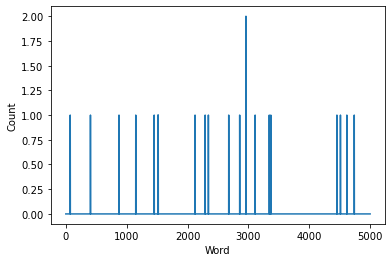

In [ ]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', data['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(data['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization & Padding 
 [  42    1  307   66 1726 1119   40 2378    2 1211  205    2  215   32
  155  100   49   69 1068  215   50    3    6  546    3   50 4179    3
 2806    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
print(len(X[0]),len(data['clean_text'][0]))

50 210


In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
# Convert categorical variable into dummy/indicator variables.
y = pd.get_dummies(data['category'])
# Train and Test split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Extracting validation set from the train set
valid_size=1000
X_valid, y_valid = X_train[-valid_size:], y_train[-valid_size:]
X_test, y_test = X_train[:-valid_size], y_train[:-valid_size]

print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_valid.shape, y_valid.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (114078, 50) (114078, 3)
Validation Set -> (1000, 50) (1000, 3)
Test Set -> (113078, 50) (113078, 3)


In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    # Function to calculate f1 score

    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall

vocab_size = 5000
embedding_size = 32

# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy', Precision(), Recall()])

# Train model
num_epochs = 10
batch_size = 32
history = model.fit(X_train, y_train,validation_data=(X_valid, y_valid),batch_size=batch_size, epochs=num_epochs, verbose=0)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 171,523
Trainable params: 171,523
Non-trainable params: 0
__________________________________________________

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9868
Precision : 0.9886
Recall    : 0.9853
F1 Score  : 0.9870


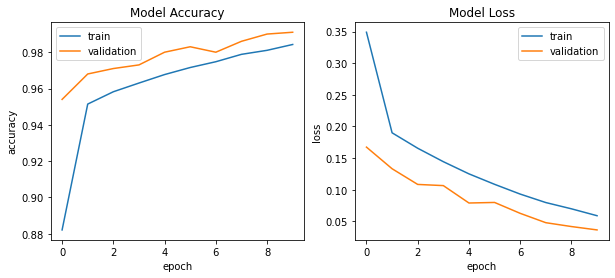

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

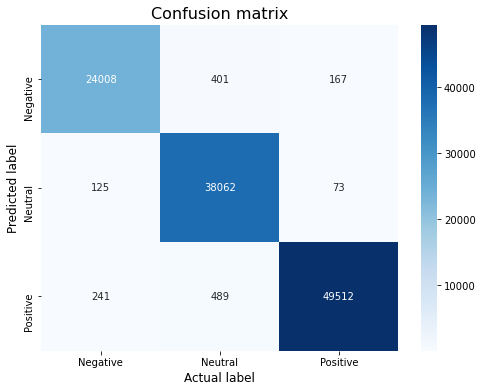

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [ ]:
# Save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

Best model saved


In [ ]:
from keras.models import load_model

# Load model
model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50

    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [ ]:
predict_class(['"This is the worst day of my life'])

The predicted sentiment is Negative


In [ ]:
predict_class(['"hello how are you'])

The predicted sentiment is Neutral


In [ ]:
predict_class(['"always be happy'])

The predicted sentiment is Positive
